# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Prostate_Cancer.csv")

In [3]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


# transformasi data

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis_result'] = le.fit_transform(df['diagnosis_result'])

In [6]:
df.to_csv('kanker_prostat.csv')

In [7]:
df['diagnosis_result'].value_counts()

diagnosis_result
1    62
0    38
Name: count, dtype: int64

# pisahkan data atribut dengan label

In [8]:
X = df.drop(columns=['diagnosis_result', 'id'], axis=1)
Y = df['diagnosis_result']

In [9]:
print(X)

    radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0       23       12        151   954       0.143        0.278     0.242   
1        9       13        133  1326       0.143        0.079     0.181   
2       21       27        130  1203       0.125        0.160     0.207   
3       14       16         78   386       0.070        0.284     0.260   
4        9       19        135  1297       0.141        0.133     0.181   
..     ...      ...        ...   ...         ...          ...       ...   
95      23       16        132  1264       0.091        0.131     0.210   
96      22       14         78   451       0.105        0.071     0.190   
97      19       27         62   295       0.102        0.053     0.135   
98      21       24         74   413       0.090        0.075     0.162   
99      16       27         94   643       0.098        0.114     0.188   

    fractal_dimension  
0               0.079  
1               0.057  
2               0.060  
3  

In [10]:
print(Y)

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result, Length: 100, dtype: int32


# Visualisasi Data

id                   100
diagnosis_result       2
radius                16
texture               17
perimeter             55
area                  95
smoothness            45
compactness           85
symmetry              64
fractal_dimension     32
dtype: int64


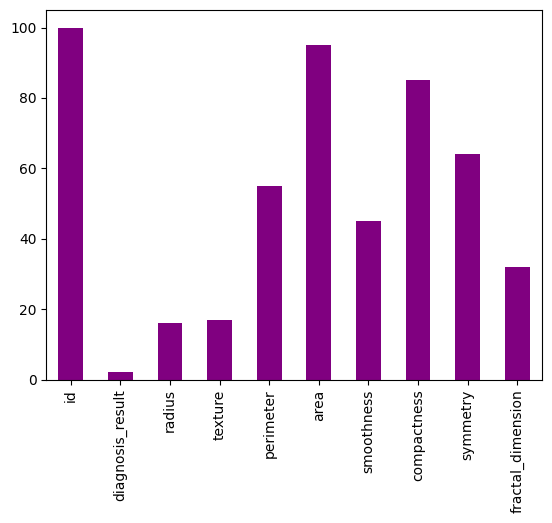

In [11]:
df.nunique().plot(kind='bar',color='purple')
print(df.nunique())

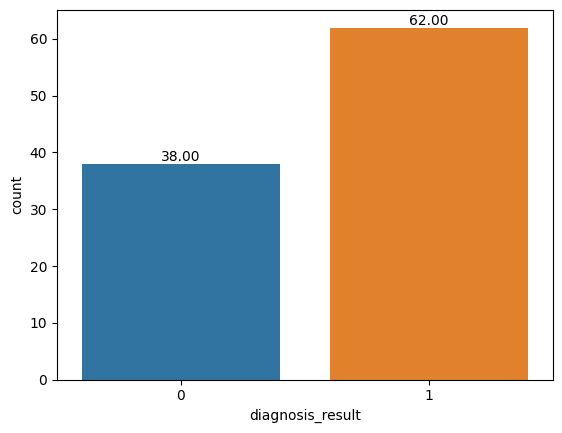

In [12]:
import seaborn as sns
splot = sns.countplot(x = 'diagnosis_result', data = df)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Split data

In [13]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, x_train.shape, x_test.shape)

(100, 8) (80, 8) (20, 8)


# Membuat model training

In [17]:
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluasi model

In [19]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [20]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8375


In [21]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [22]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.9


# Model Prediksi

In [36]:
input_data = (17,24,60,274,0.102,0.065,0.182,0.069)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Pasien mengidap kanker prostat jinak')
else:
    print('Pasien mengidap kanker prostat ganas')

[0]
Pasien mengidap kanker prostat jinak


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Save Model

In [37]:
import pickle

filename = 'prostat.sav'
pickle.dump(model, open(filename, 'wb'))